**IMPORT LIBRARY YANG DIBUTUHKAN**

In [54]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [55]:
!wget https://raw.githubusercontent.com/NewReyy/NLP-KlasifikasiBerita/main/bbc-text.csv

--2024-01-16 14:54:16--  https://raw.githubusercontent.com/NewReyy/NLP-KlasifikasiBerita/main/bbc-text.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/plain]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  --.-KB/s    in 0.04s   

2024-01-16 14:54:16 (110 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



**LOAD DATASET**

In [56]:
df = pd.read_csv("bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [57]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [59]:
count = df['category'].value_counts()
print("Jumlah kelas atau category:")
for category, jumlah in count.items():
    print(f"{category}: {jumlah}")

Jumlah kelas atau category:
sport: 511
business: 510
politics: 417
tech: 401
entertainment: 386


In [60]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**PREPROCESSING**

In [61]:
df_clean = df.copy()

In [62]:
df_clean

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


**CASE FOLDING**

In [65]:
df_clean.text = df_clean.text.apply(lambda x: x.lower())

In [66]:
import nltk, os, re, string

**MEMBUAT FUNGSI CLEANER UNTUK MENGHAPUS TANDA BACA DARI DATA TEKS**

In [67]:
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
df_clean.text = df_clean.text.apply(lambda x: cleaner(x))

**LEMMATIZER UNTUK MERUBAH KEDALAM BENTUK ASLI**

In [68]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
df_clean.text = df_clean.text.apply(lambda x: lem(x))

**REM NUMBER UNTUK MENGHAPUS ANGKA**

In [76]:
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
df_clean.text = df_clean.text.apply(lambda x: rem_numbers(x))

**STOPWORDS UNTUK MENGHAPUS KATA-KATA UMUM**

In [77]:
from nltk.corpus import stopwords
stop_word = set(stopwords.words('english'))
def stopword(data):
    return ' '.join([w for w in data.split() if w not in stop_word])
df_clean.loc[:, 'text'] = df_clean['text'].apply(lambda x: stopword(x))

**MENAMPILKAN DATA PREPROCESSING**

In [78]:
df_clean

,category,text
0,tech,tv future hand viewer home theatre system plas...
1,business,worldcom bos left book alone former worldcom b...
2,sport,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raid box office ocean twelve crim...
...,...,...
2220,business,car pull u retail figure u retail sale fell ja...
2221,politics,kilroy unveils immigration policy exchatshow h...
2222,entertainment,rem announce new glasgow concert u band rem an...
2223,politics,political squabble snowball become commonplace...


**MODELLING**
#### ONE HOT ENCODING

In [79]:
category = pd.get_dummies(df_clean.category)
df_new = pd.concat([df_clean, category], axis=1)
df_new = df_new.drop(columns='category')

df_new

,text,business,entertainment,politics,sport,tech
0,tv future hand viewer home theatre system plas...,0,0,0,0,1
1,worldcom bos left book alone former worldcom b...,1,0,0,0,0
2,tiger wary farrell gamble leicester say rushed...,0,0,0,1,0
3,yeading face newcastle fa cup premiership side...,0,0,0,1,0
4,ocean twelve raid box office ocean twelve crim...,0,1,0,0,0
...,...,...,...,...,...,...
2220,car pull u retail figure u retail sale fell ja...,1,0,0,0,0
2221,kilroy unveils immigration policy exchatshow h...,0,0,1,0,0
2222,rem announce new glasgow concert u band rem an...,0,1,0,0,0
2223,political squabble snowball become commonplace...,0,0,1,0,0


#### SPLITTING DATA & TOKENIZER

In [80]:
X = df_new['text'].values
Y = df_new[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x',
                      filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')

tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(seq_train)
padded_test = pad_sequences(seq_test)

#### ARSITEKTUR MODEL

In [83]:
#Import TensorFlow:
import tensorflow as tf

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(input_dim=5000, output_dim=64),
    LSTM(128),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

In [87]:
# Compile model dengan optimizer Adam dan learning rate yang dapat diatur
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
class berhenti(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9:
      print('\nAkurasi sudah mencapai lebih dari 90%')
      self.model.stop_training = True
Callback = berhenti()

In [89]:
history = model.fit(padded_train, Y_train,
                    epochs = 20,
                    validation_data = (padded_test, Y_test), # menampilkan akurasi pengujian data validasi
                    verbose = 2,
                    callbacks = [Callback],
                    validation_steps = 30)

Epoch 1/20
56/56 - 212s - loss: 1.5364 - accuracy: 0.3056 - val_loss: 1.4509 - val_accuracy: 0.4944 - 212s/epoch - 4s/step
Epoch 2/20
56/56 - 208s - loss: 1.1182 - accuracy: 0.4949 - val_loss: 0.8624 - val_accuracy: 0.6292 - 208s/epoch - 4s/step
Epoch 3/20
56/56 - 207s - loss: 0.8415 - accuracy: 0.6494 - val_loss: 0.6861 - val_accuracy: 0.7258 - 207s/epoch - 4s/step
Epoch 4/20
56/56 - 208s - loss: 0.4533 - accuracy: 0.8247 - val_loss: 0.6776 - val_accuracy: 0.7258 - 208s/epoch - 4s/step
Epoch 5/20
56/56 - 207s - loss: 0.2057 - accuracy: 0.9466 - val_loss: 0.4572 - val_accuracy: 0.8607 - 207s/epoch - 4s/step
Epoch 6/20
56/56 - 208s - loss: 0.0723 - accuracy: 0.9809 - val_loss: 0.3729 - val_accuracy: 0.8966 - 208s/epoch - 4s/step
Epoch 7/20
56/56 - 206s - loss: 0.0318 - accuracy: 0.9955 - val_loss: 0.4417 - val_accuracy: 0.8944 - 206s/epoch - 4s/step
Epoch 8/20
56/56 - 207s - loss: 0.0857 - accuracy: 0.9742 - val_loss: 0.4157 - val_accuracy: 0.8854 - 207s/epoch - 4s/step
Epoch 9/20
56/56

#### **VISUALIZATION GRAPH**

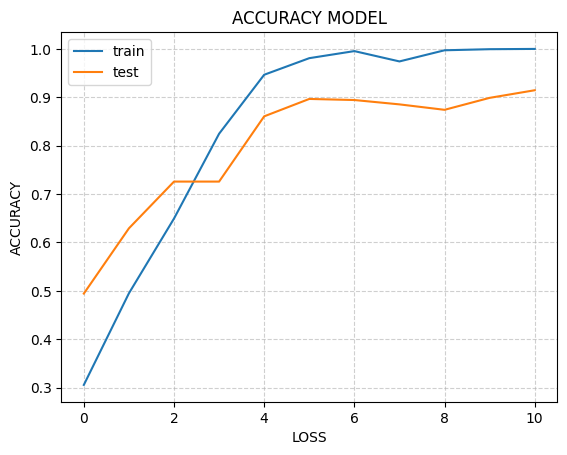

In [94]:
#UNTUK MENAMPILKAN GRAFIK ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ACCURACY MODEL')
plt.ylabel('ACCURACY')
plt.xlabel('LOSS')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

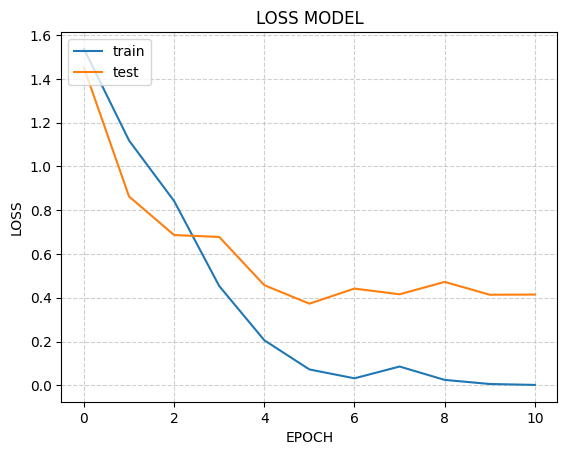

In [95]:
#UNTUK MENAMPILKAN GRAFIK LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LOSS MODEL')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(['train', 'test'], loc='upper left')
plt.show()